# STOCK PREDICTION - STA, EMA

<p> In this section, the user will be presented with predictions of the evolution on stock´s ******* ---> Open, High, Low, Close price and Volume********. Reader (assuming he is as a stock buyer) can use the model predictions to help him decide when to buy or sell the stocks. However, it should be noted that stock market prices are highly volatile with no consistent patterns and that makes stock prices modelling difficult. It is impossible to model stock prices over time near-perfectly but scientists are not discouraged by this. There are many approaches on stock´s prices prediction computation. We decided to use two short-term measures - standard averaging (STA) and exponential moving average (EMA) -  and one long-term - LSTM (Long Short-Term Memory). This file will focus on short-term predicting via STA and EMA. </p>

<p>The short-term predictions via averaging can be reliably used as one-step ahead prediction (in our case one trading day ahead prediction), using them for more than one time step is not recommended (can lead to bad results). Put simply, these methods are, quite intuitively, based on averaging historically observed values and using the averages as predictions. In case of standard averaging (STA), the price at time t+1 equals the average of historical values within specific time window (e.g. last 100 days). In other words, normal averaging is based on the following equation:  $x_{t+1}=1/N\sum^{t}_{i=t-N}x_{i}$. In the exponential moving average method (EMA), the stock price at time t+1 is calculated as follows: $x_{t+1}=EMA_{t}=\gamma*EMA_{t-1} + (1-\gamma)*x_{t}$ , where $EMA_{0}=0$ and $EMA$ is the exponential moving average value maintained over time. </p>

Short-term predictions are one point in time predictions. Therefore, they will be presented just in the numerical form via table, while LSTM predictions will be showed graphically rather than numerically. 

,  -> no graph, just value predicted presented; LSTM will be presented the other way - graphically rather than numerically; LSTM prediction done only for Close??

<p>While averaging methods are used for predicting the next value, LSTM method predicts future sequence of values (usually 30 days).  </p>

**Note**: The models are not "golden rule" you should follow no matter what. It is important to understand that those models provide some sort of guidance on how the stock market might develop and also help you understand the market. Nevertheless, it is not wise to base your investment strategy solely on the predictions given by the models and we as authors of this project definitely do not encourage you to do so.

**Disclaimer**: The mathematical methods and approaches used in the prediction analyses employed by authors of this project are based on the measures standardly used in the research area. Thus, the authors do not claim the procedures used are their own inventions and do not take any credit for them.

Issues with tensorflow package...It may happen that when installing the tensorflow package (if you already do not have one installed), you may encounter an error of the following fashion *Could not install packages due to an EnvironmentError: [WinError 5] Access is denied:* . There are two possible solutions to this problem. Firstly, you run the following command: "pip install tensorflow --user". Or secondly, you should change the access permission, where the particular package is going to install. In either case, after you run the command/modify access permission, it is better to close the command line (or e.g. Jupyter Notebook), open new one and try to install the package again.

In [2]:
!pip install keras

  Using cached typing_extensions-4.0.1-py3-none-any.whl (22 kB)
  Created wheel for pathlib: filename=pathlib-1.0.1-py3-none-any.whl size=14353 sha256=4ee1eb54166377be6fe813d2c0c1931bb05e31060bfa9895389b9b073beef64e
  Stored in directory: c:\users\martina\appdata\local\pip\cache\wheels\59\02\2f\ff4a3e16a518feb111ae1405908094483ef56fec0dfa39e571
Successfully built pathlib
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.2
    Uninstalling typing-extensions-3.7.4.2:
      Successfully uninstalled typing-extensions-3.7.4.2


In [31]:
# PREDICTIONS
# můžu dělat buď jednoduchou short-term predikci - jen o jeden krok dopředu (one trading day ahead - 1) standard averaging, 2)exponential moving average
# nebo dlouhodobější predikci - LSTM model

import numpy as np
import yfinance as yf
import pandas as pd
#!pip install tabulate
#!pip install prettytable
#!pip install math
from tabulate import tabulate #for table
from prettytable import PrettyTable #for table
import math #for truncating/rounding numbers

In [3]:
# stáhnout data, abych měla cvičně s čím pracovat

#define the ticker symbol
tickerSymbol = 'GOOGL'
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-5-31', end='2020-5-31')

#POZN: později změnit time span, teď mám cvičně nějakých 10 let od 2010 do 2020


In [4]:
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-01,240.455460,245.775772,240.300293,241.426422,5328266,0,0.0
2010-06-02,243.583588,247.182175,240.970978,246.931931,5076518,0,0.0
2010-06-03,247.802795,254.254257,247.597595,253.053055,7294099,0,0.0
2010-06-04,250.110107,254.879883,248.598602,249.609604,7832759,0,0.0
2010-06-07,249.779785,250.705704,241.816818,243.003006,7258135,0,0.0
...,...,...,...,...,...,...,...
2020-05-22,1403.900024,1417.000000,1395.949951,1413.239990,1427200,0,0.0
2020-05-26,1441.959961,1445.109985,1419.400024,1421.369995,2229500,0,0.0
2020-05-27,1420.000000,1425.349976,1394.599976,1420.280029,1584200,0,0.0


In [5]:
#checking that ticker Df is really a dataframe
isinstance(tickerDf, pd.DataFrame)

True

In [88]:
#defining a function for rounding to specific number of decimal places
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier


In [105]:
#-------NOT RUN-----------
# adding idx column

#tickerDf.index
tickerDf["idx"] = range(1, len(tickerDf)+1)

In [ ]:
# df1 = tickerDf.assign(e=pd.Series(np.random.randn(sLength)).values)

In [108]:
#-------NOT RUN-----------
df2 = tickerDf.reindex(tickerDf.idx)

df2

,Open,High,Low,Close,Volume,Dividends,Stock Splits,idx
idx,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


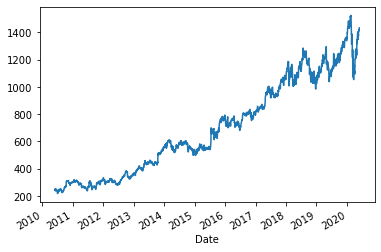

In [6]:
#POZN: v DataCamp příkladu použili normalization - protože měli time span 1970-2017 (tím pádem stock price 1970 a 2017 se hodně liší), my máme kratší, takže normalizaci dělat nemusíme??
# i když teda....graf mi říká, že to taky dost lítá..
tickerDf.Close.plot()

In [5]:

# the mean squared error (MSE) tells you how close a regression line is to a set of points - MSE asi užitečná

In [7]:
##--------------------- STANDARD AVERAGING ----------------- podle DataCampu

# STANDARD AVERAGING
# idea - calculate average over some period and take it as prediction for next day

std_avg_predictions = []
std_avg_x = [] # ????????? na to potřebuju??????
mse_errors = []
N = 100 #from how many prices back is the average computed

# tj, když budu chtít jíd ode dneška 100 observations dozadu
# tickerDf.Close[tickerDf.Close.size - 100 :,]
tickerDf.Close[tickerDf.Close.size - N:, ]

std_avg_predictions = np.mean(tickerDf.Close[tickerDf.Close.size - N:, ])
#std_avg_predictions
std_mse_errors_t = (tickerDf.Close[tickerDf.Close.size-1:, ] - std_avg_predictions)**2
std_mse_errors_t_minus_1 = (tickerDf.Close[tickerDf.Close.size-2:tickerDf.Close.size-1, ] - std_avg_predictions)**2
#mse_errors

print('One trading day ahead prediciton on XXXticker Closing price using standard averaging method is : %.5f'%(std_avg_predictions))
print('MSE error for standard averaging on XXXticker Closing price is : %.5f'%(0.5*np.mean(std_mse_errors_t)))
print('MSE error for standard averaging on XXXticker Closing price is : %.5f'%(0.5*np.mean(std_mse_errors_t_minus_1)))

#POZN: MSE error se mi zdá divná - na DT to počítal jako předchozí prediction-současná hodnota + nemám tam 0.5*np.mean()
#POZN2: MSE error je divná, protože já jsem tam zapomněla udělat sumu :) :)

One trading day ahead prediciton on XXXticker Closing price using standard averaging method is : 1333.58500
MSE error for standard averaging on XXXticker Closing price is : 4993.50382
MSE error for standard averaging on XXXticker Closing price is : 3583.23348


In [107]:
##--------------------- STANDARD AVERAGING ----------------- podle mě

# STANDARD AVERAGING
# idea - calculate average over some period and take it as prediction for next day

std_avg_predictions = []
std_avg_x = [] # ????????? na to potřebuju??????
mse_errors = []
N = 100 #from how many prices back is the average computed

# tj, když budu chtít jíd ode dneška 100 observations dozadu
# tickerDf.Close[tickerDf.Close.size - 100 :,]

#Open
#prediction value
tickerDf.Open[tickerDf.Open.size - N:, ]
std_avg_predictions_op = np.mean(tickerDf.Open[tickerDf.Open.size - N:, ])
#mse_errors


#High
#prediction value
tickerDf.High[tickerDf.High.size - N:, ]
std_avg_predictions_h = np.mean(tickerDf.High[tickerDf.High.size - N:, ])
#mse_errors


#Low
#prediction value
tickerDf.Low[tickerDf.Low.size - N:, ]
std_avg_predictions_l = np.mean(tickerDf.Low[tickerDf.Low.size - N:, ])
#mse_errors


#Close
#prediction value
tickerDf.Close[tickerDf.Close.size - N:, ]
std_avg_predictions_cl = np.mean(tickerDf.Close[tickerDf.Close.size - N:, ])
#mse_errors


#Volume
#prediction value
tickerDf.Volume[tickerDf.Volume.size - N:, ]
std_avg_predictions_vol = np.mean(tickerDf.Volume[tickerDf.Volume.size - N:, ])
#mse_errors

print(std_avg_predictions_op)
print(std_avg_predictions_h)
print(std_avg_predictions_l)
print(std_avg_predictions_cl)
print(std_avg_predictions_vol)

1332.4404956054686
1350.937198486328
1313.0989025878907
1333.5850024414062
2413433.0


In [102]:
##--------------------- STANDARD AVERAGING ----------------- podle mě s for loop

# STANDARD AVERAGING
# idea - calculate average over some period and take it as prediction for next day

std_avg_predictions = []
std_avg_x = [] # ????????? na to potřebuju??????
mse_errors = []
N = 100 #from how many prices back is the average computed

# tj, když budu chtít jíd ode dneška 100 observations dozadu
# tickerDf.Close[tickerDf.Close.size - 100 :,]

std_prediction_list=[1,2,3,4,5] #create a list to which we will write the prediction values (it cannot be empty because with lists, we can 
                             # use indexing only to access or modify an item that already exists ) (tj. na začátku musím něco přiřadit, abych to mohla pak přepsat)
#myTable22 = PrettyTable(["Ticker", "Prediction method", "Open", "High", "Low", "Close", "Volume"]) 
pred_idex=-1

Open=tickerDf.Open
High=tickerDf.High
Low=tickerDf.Low
Close=tickerDf.Close
Volume=tickerDf.Volume

featurelist = [Open, High, Low, Close, Volume]
for feature in featurelist:
    pred_idex=pred_idex+1
    feature[feature.size - N:, ]
    std_prediction = truncate(np.mean(feature[feature.size - N:, ]),2)
    std_prediction_list[pred_idex]=std_prediction #assign predicted value to a specific position in std_predictions_list
    print(std_prediction)


1332.44
1350.93
1313.09
1333.58
2413433.0


In [103]:
std_prediction_list

[1332.44, 1350.93, 1313.09, 1333.58, 2413433.0]

In [10]:
###-------------------- EXPONENTIAL AVERAGING (exponential moving average method)------------podle DataCamp


# EXPONENTIAL AVERAGING (exponential moving average method)
# idea - basically calculates the exponential moving average from t+1 time step and uses that as the one step ahead prediction

 
window_size = 100 #choose the window size again ????? asi u EMA ani nepotřebuju...
N = len(tickerDf)
exp_avg_predictions = []
exp_avg_x = []  #????? smazat??????
exp_mse_errors = []


# the equation: x_t+1=EMA_t=γ×EMAt−1+(1−γ)xt where EMA0=0 and EMA is the exponential moving average value you maintain over time

gamma=0.1 # můžu si zvolit - what is the contribution of the most recent prediction is to the EMA - in our case γ=0.1 gets only 10% of the current value into the EMA

running_mean = 0.0
exp_avg_predictions.append(running_mean)

for pred_idx in range(1,N):

    running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf[idx-1]
    exp_avg_predictions.append(running_mean)
    exp_mse_errors.append((exp_avg_predictions[-1]-tickerDf["Close"])**2)
    #exp_avg_x.append(date)

#print('One trading day ahead prediciton on XXXticker Closing price using exponnential averaging method is : %.5f'%(exp_avg_predictions))    
#print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(exp_mse_errors)))

In [ ]:
exp_avg_predictions

In [11]:
###-------------------- EXPONENTIAL AVERAGING (exponential moving average method)------------podle mě


# EXPONENTIAL AVERAGING (exponential moving average method)
# idea - basically calculates the exponential moving average from t+1 time step and uses that as the one step ahead prediction

# finální verze - predikce + MSE pro všechny hodnoty jednoho tickeru
# pomocí while loop pro každý feature zvlášť (tj. definuju "natvrdo", žádné zobecnění)

# toto dělat nemusím - nový sloupec vlastně nepotřebuju
#tickerDf["novy2"]=np.nan  # create an empty column first so you can write in it

siz=len(tickerDf)

#idex=0
#running_mean = 0.0
#gamma=0.1

###Open
idex_op=0
running_mean_op = 0.0
gamma_op=0.1
while idex_op < siz:
    #vypocet
    running_mean_op = running_mean_op*gamma_op + (1.0-gamma_op)*tickerDf["Open"][idex_op]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
    idex_op=idex_op+1
    #POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
    exp_avg_prediction_op=running_mean_op
print(exp_avg_prediction_op)

#projedu znova, akorát dám o jedno observation méně, abych měla prediction v čase t-1
idex_op=0
running_mean_op = 0.0
gamma_op=0.1
while idex_op < siz-1:
    running_mean_op = running_mean_op*gamma_op + (1.0-gamma_op)*tickerDf["Open"][idex_op]
    idex_op=idex_op+1
    exp_avg_prediction_op_t_minus_1=running_mean_op
    mse_errors_exp_avg_prediction_op = ((exp_avg_prediction_op_t_minus_1-tickerDf["Open"][idex_op])**2)
print(mse_errors_exp_avg_prediction_op)


###High
idex_h=0
running_mean_h = 0.0
gamma_h=0.1
while idex_h < siz:
    #vypocet
    running_mean_h = running_mean_h*gamma_h + (1.0-gamma_h)*tickerDf["High"][idex_h]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
    idex_h=idex_h+1
    #POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
    exp_avg_prediction_h=running_mean_h
print(exp_avg_prediction_h)

idex_h=0
running_mean_h = 0.0
gamma_h=0.1
while idex_h < siz-1:
    running_mean_h = running_mean_h*gamma_h + (1.0-gamma_h)*tickerDf["High"][idex_h]
    idex_h=idex_h+1
    exp_avg_prediction_h_t_minus_1=running_mean_h
    mse_errors_exp_avg_prediction_h = ((exp_avg_prediction_h_t_minus_1-tickerDf["High"][idex_h])**2)
print(mse_errors_exp_avg_prediction_h)



###Low
idex_l=0
running_mean_l = 0.0
gamma_l=0.1
while idex_l < siz:
    #vypocet
    running_mean_l = running_mean_l*gamma_l + (1.0-gamma_l)*tickerDf["Low"][idex_l]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
    idex_l=idex_l+1
    #POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
    exp_avg_prediction_l=running_mean_l
print(exp_avg_prediction_l)

idex_l=0
running_mean_l = 0.0
gamma_l=0.1
while idex_l < siz-1:
    running_mean_l = running_mean_l*gamma_l + (1.0-gamma_l)*tickerDf["Low"][idex_l]
    idex_l=idex_l+1
    exp_avg_prediction_l_t_minus_1=running_mean_l
    mse_errors_exp_avg_prediction_l = ((exp_avg_prediction_l_t_minus_1-tickerDf["Low"][idex_l])**2)
print(mse_errors_exp_avg_prediction_l)



###Close
idex_cl=0
running_mean_cl = 0.0
gamma_cl=0.1
while idex_cl < siz:
    #vypocet
    running_mean_cl = running_mean_cl*gamma_cl + (1.0-gamma_cl)*tickerDf["Close"][idex_cl]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
    idex_cl=idex_cl+1
    
    #POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
    exp_avg_prediction_cl=running_mean_cl
print(exp_avg_prediction_cl)

idex_cl=0
running_mean_cl = 0.0
gamma_cl=0.1
while idex_cl < siz-1:
    running_mean_cl = running_mean_cl*gamma_cl + (1.0-gamma_cl)*tickerDf["Close"][idex_cl]
    idex_cl=idex_cl+1
    exp_avg_prediction_cl_t_minus_1=running_mean_cl
    mse_errors_exp_avg_prediction_cl = ((exp_avg_prediction_cl_t_minus_1-tickerDf["Close"][idex_cl])**2)
print(mse_errors_exp_avg_prediction_cl)


###Volume    
idex_vol=0
running_mean_vol = 0.0
gamma_vol=0.1
while idex_vol < siz:
    #vypocet
    running_mean_vol = running_mean_vol*gamma_vol + (1.0-gamma_vol)*tickerDf["Volume"][idex_vol]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
    idex_vol=idex_vol+1
    
    #POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
    exp_avg_prediction_vol=running_mean_vol
print(exp_avg_prediction_vol)

idex_vol=0
running_mean_vol = 0.0
gamma_vol=0.1
while idex_vol < siz-1:
    running_mean_vol = running_mean_vol*gamma_vol + (1.0-gamma_vol)*tickerDf["Volume"][idex_vol]
    idex_vol=idex_vol+1
    exp_avg_prediction_vol_t_minus_1=running_mean_vol
    mse_errors_exp_avg_prediction_vol = ((exp_avg_prediction_vol_t_minus_1-tickerDf["Volume"][idex_vol])**2)
print(mse_errors_exp_avg_prediction_vol)

1418.605250755487
332.99058262214277
1437.3288158721214
35.86038403308941
1414.267609116544
293.22156478560873
1432.0126280856548
227.2228970253392
1841653.5874736058
11122681717.688683


In [96]:
###-------------------- EXPONENTIAL AVERAGING (exponential moving average method)------------podle mě s for loop


# EXPONENTIAL AVERAGING (exponential moving average method)
# idea - basically calculates the exponential moving average from t+1 time step and uses that as the one step ahead prediction


# finální verze - predikce pro všechny hodnoty jednoho tickeru
# pomocí for loop
# funguje pro všech 5 features, YES!!!!!!!!!!!!
#ještě chci přidat zapisování do tabulky

# toto dělat nemusím - nový sloupec vlastně nepotřebuju
#tickerDf["novy2"]=np.nan  # create an empty column first so you can write in it

siz=len(tickerDf)
idex=0

running_mean = 0.0
gamma=0.1

exp_prediction_list=[1,2,3,4,5] #create a list to which we will write the prediction values (it cannot be empty because with lists, we can 
                             # use indexing only to access or modify an item that already exists ) (tj. na začátku musím něco přiřadit, abych to mohla pak přepsat)
# myTable22 = PrettyTable(["Ticker", "Prediction method", "Open", "High", "Low", "Close", "Volume"]) 
pred_idex=-1

Open=tickerDf.Open
High=tickerDf.High
Low=tickerDf.Low
Close=tickerDf.Close
Volume=tickerDf.Volume

featurelist = [Open, High, Low, Close, Volume]
for feature in featurelist:
    running_mean = 0.0
    idex=0
    pred_idex=pred_idex+1
    while idex < siz:
    #vypocet
        running_mean = running_mean*gamma + (1.0-gamma)*feature[idex]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
        idex=idex+1
    
        #POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
        exp_prediction=truncate(running_mean,2)
        #print(prediction)
   # while pred_idex < 5:
   #     pred_idex=0
   #     predictions_list[pred_idex]=prediction
   #     pred_idex=pred_idex+1
        
        #idex=0
        
    exp_prediction_list[pred_idex]=exp_prediction #assign predicted value to a specific position in exp_predictions_list
    
    print(exp_prediction)

1418.6
1437.32
1414.26
1432.01
1841653.58


In [50]:
# assign data
mydata = [{"a", "b", "c", "d", "e"}, 
          {"aa", "bb", "cc", "dd", "ee"}]
  
# create header
head = ["Open", "High", "Low", "Close", "Volume"]
  
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+--------+--------+-------+---------+----------+
| Open   | High   | Low   | Close   | Volume   |
+========+========+=======+=========+==========+
| c      | b      | d     | e       | a        |
+--------+--------+-------+---------+----------+
| dd     | aa     | ee    | bb      | cc       |
+--------+--------+-------+---------+----------+


In [112]:
# specify the column names while initializing the table 
myTable = PrettyTable(["Ticker", "Prediction method", "Open", "High", "Low", "Close", "Volume"]) 
  
# add rows 
#myTable.add_row(["ticker1", "Standard Averaging", std_avg_predictions_op, std_avg_predictions_h, std_avg_predictions_l, std_avg_predictions_cl, std_avg_predictions_vol]) 
myTable.add_row(["ticker1", "Standard Averaging", std_prediction_list[0], std_prediction_list[1], std_prediction_list[2], std_prediction_list[3], std_prediction_list[4]]) 
#myTable.add_row(["ticker1", "Exponential Averaging", exp_avg_prediction_op, exp_avg_prediction_h, exp_avg_prediction_l, exp_avg_prediction_cl, exp_avg_prediction_vol]) 
myTable.add_row(["ticker1", "Exponential Averaging", exp_prediction_list[0], exp_prediction_list[1], exp_prediction_list[2], exp_prediction_list[3], exp_prediction_list[4]]) 
myTable.add_row(["ticker1", "LSTM method", "-", "-", "-", "-", "-"])   
print(myTable)

+---------+-----------------------+---------+---------+---------+---------+------------+
|  Ticker |   Prediction method   |   Open  |   High  |   Low   |  Close  |   Volume   |
+---------+-----------------------+---------+---------+---------+---------+------------+
| ticker1 |   Standard Averaging  | 1332.44 | 1350.93 | 1313.09 | 1333.58 | 2413433.0  |
| ticker1 | Exponential Averaging |  1418.6 | 1437.32 | 1414.26 | 1432.01 | 1841653.58 |
| ticker1 |      LSTM method      |    -    |    -    |    -    |    -    |     -      |
+---------+-----------------------+---------+---------+---------+---------+------------+


In [121]:
ticker1="a"
ticker2="b"
ticker3="c"
ticker4="d"
ticker_list=[ticker1, ticker2, ticker3, ticker4]
len(ticker_list)

if ticker_list==[ticker1, ticker2, ticker3, ticker4]:
    myTable.add_row(["ticker2", "LSTM method", "-", "-", "-", "-", "-"])  
    myTable.add_row(["ticker3", "LSTM method", "-", "-", "-", "-", "-"]) 
    myTable.add_row(["ticker4", "LSTM method", "-", "-", "-", "-", "-"]) 
    print(myTable)

+---------+-----------------------+---------+---------+---------+---------+------------+
|  Ticker |   Prediction method   |   Open  |   High  |   Low   |  Close  |   Volume   |
+---------+-----------------------+---------+---------+---------+---------+------------+
| ticker1 |   Standard Averaging  | 1332.44 | 1350.93 | 1313.09 | 1333.58 | 2413433.0  |
| ticker1 | Exponential Averaging |  1418.6 | 1437.32 | 1414.26 | 1432.01 | 1841653.58 |
| ticker1 |      LSTM method      |    -    |    -    |    -    |    -    |     -      |
| ticker2 |      LSTM method      |    -    |    -    |    -    |    -    |     -      |
| ticker3 |      LSTM method      |    -    |    -    |    -    |    -    |     -      |
| ticker4 |      LSTM method      |    -    |    -    |    -    |    -    |     -      |
+---------+-----------------------+---------+---------+---------+---------+------------+


In [3]:
ticker1="a"
ticker2="b"
ticker3="c"
ticker4="d"
ticker_list=[ticker1, ticker2, ticker3, ticker4]
len(ticker_list)

4

In [6]:
# specify the column names while initializing the table 
#myTable = PrettyTable(["Ticker", "Prediction method", "Open", "High", "Low", "Close", "Volume"]) 


for ticker in ticker_list:
    print("Short-term predictions on ticker", ticker, "are:")
# add rows 
#myTable.add_row(["ticker1", "Standard Averaging", std_avg_predictions_op, std_avg_predictions_h, std_avg_predictions_l, std_avg_predictions_cl, std_avg_predictions_vol]) 
#myTable.add_row(["ticker1", "Standard Averaging", std_prediction_list[0], std_prediction_list[1], std_prediction_list[2], std_prediction_list[3], std_prediction_list[4]]) 
#myTable.add_row(["ticker1", "Exponential Averaging", exp_avg_prediction_op, exp_avg_prediction_h, exp_avg_prediction_l, exp_avg_prediction_cl, exp_avg_prediction_vol]) 

Short-term predictions on ticker a are:
Short-term predictions on ticker b are:
Short-term predictions on ticker c are:
Short-term predictions on ticker d are:


In [ ]:
zkusit, co udělá predikce, když budu mít dataset s vícero tickery
(pravděpodobně budeme definovat fci, která vytvoří subset podle toho, co si uživatel zadá v webapp?)

In [140]:
pred_idx

2516

In [134]:
tickerDf.Close[tickerDf.Close.size-2:tickerDf.Close.size-1, ]

Date
2020-05-28    1418.23999
Name: Close, dtype: float64

In [145]:
#tickerDf["idx"] = range(1, len(tickerDf)+1)
tickerDf["novy"]=np.nan

In [147]:
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits,idx,novy
Date,,,,,,,,,
2010-06-01,240.455460,245.775772,240.300293,241.426422,5328266,0,0.0,1,NaN
2010-06-02,243.583588,247.182175,240.970978,246.931931,5076518,0,0.0,2,NaN
2010-06-03,247.802795,254.254257,247.597595,253.053055,7294099,0,0.0,3,NaN
2010-06-04,250.110107,254.879883,248.598602,249.609604,7832759,0,0.0,4,NaN
2010-06-07,249.779785,250.705704,241.816818,243.003006,7258135,0,0.0,5,NaN
...,...,...,...,...,...,...,...,...,...
2020-05-22,1403.900024,1417.000000,1395.949951,1413.239990,1427200,0,0.0,2513,NaN
2020-05-26,1441.959961,1445.109985,1419.400024,1421.369995,2229500,0,0.0,2514,NaN
2020-05-27,1420.000000,1425.349976,1394.599976,1420.280029,1584200,0,0.0,2515,NaN


In [160]:
tickerDf["novy"]=np.nan  # create an empty column first so you can write in it
siz=len(tickerDf)
for idx in range(siz+1):

    tickerDf["novy"] = idx+1
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf[idx-1]
    #exp_avg_predictions.append(running_mean)
    #exp_mse_errors.append((exp_avg_predictions[-1]-tickerDf["Close"])**2)
    #exp_avg_x.append(date)

In [161]:
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits,idx,novy
Date,,,,,,,,,
2010-06-01,240.455460,245.775772,240.300293,241.426422,5328266,0,0.0,1,2518
2010-06-02,243.583588,247.182175,240.970978,246.931931,5076518,0,0.0,2,2518
2010-06-03,247.802795,254.254257,247.597595,253.053055,7294099,0,0.0,3,2518
2010-06-04,250.110107,254.879883,248.598602,249.609604,7832759,0,0.0,4,2518
2010-06-07,249.779785,250.705704,241.816818,243.003006,7258135,0,0.0,5,2518
...,...,...,...,...,...,...,...,...,...
2020-05-22,1403.900024,1417.000000,1395.949951,1413.239990,1427200,0,0.0,2513,2518
2020-05-26,1441.959961,1445.109985,1419.400024,1421.369995,2229500,0,0.0,2514,2518
2020-05-27,1420.000000,1425.349976,1394.599976,1420.280029,1584200,0,0.0,2515,2518


In [177]:
tickerDf.iloc[(tickerDf.novy[idex]),]=4

TypeError: cannot do positional indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [nan] of <class 'numpy.float64'>

In [186]:
tickerDf["idx"][1]

2

In [198]:
tickerDf.loc[1,"Close"]

TypeError: cannot do index indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [1] of <class 'int'>

In [194]:

tickerDf.loc[idex, "novy"]

TypeError: cannot do index indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [2] of <class 'int'>

In [203]:
tickerDf.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits    float64
idx               int32
novy              int64
dtype: object

In [200]:
#tickerDf["novy"]=np.nan  # create an empty column first so you can write in it
tickerDf["novy"]=0
siz=len(tickerDf)
idex=0
while idex < siz:
    print(tickerDf.idx[idex]) #funguje
    #tickerDf["novy"][idex]=1  #nefunguje
    #tickerDf.loc[idex, "novy"] = 1
    
    #dfd.loc[2, 'a'] = 11
    #dfd.loc[radek, 'sloupec'] = assigned_value
    
    
    #tickerDf.novy[idex] = "tickerDf.idx"
    #tickerDf.iloc[(tickerDf.novy[idex]).values,]=4
    #df.loc[df.A > 5, 'B'] = 4
    #df.iloc[(df.A > 5).values, 1] = 4
    #tickerDf.loc(tickerDf.novy[idx])
    idex=idex+1
    
  
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf[idx-1]
    #exp_avg_predictions.append(running_mean)
    #exp_mse_errors.append((exp_avg_predictions[-1]-tickerDf["Close"])**2)
    #exp_avg_x.append(date)

241.42642211914062
246.9319305419922
253.0530548095703
249.60960388183594
243.0030059814453
242.63262939453125
237.24725341796875
243.74874877929688
244.49449157714844
241.8368377685547
249.24424743652344
250.88587951660156
250.290283203125
250.2652587890625
244.52452087402344
243.3683624267578
241.26626586914062
237.78778076171875
236.5765838623047
236.27627563476562
227.35736083984375
222.69769287109375
219.9649658203125
218.49349975585938
218.2532501220703
225.3253173828125
228.50851440429688
233.97897338867188
238.1531524658203
244.8448486328125
245.91590881347656
247.25726318359375
230.0350341796875
233.3233184814453
241.03604125976562
238.98898315429688
242.64764404296875
245.2752685546875
244.729736328125
246.5615692138672
242.41741943359375
242.73773193359375
242.66766357421875
245.45045471191406
245.16015625
253.4134063720703
254.30430603027344
250.36036682128906
252.9279327392578
252.1071014404297
246.11611938476562
246.25125122070312
243.4184112548828
243.0380401611328
245.5

In [207]:
#tickerDf["novy"]=np.nan  # create an empty column first so you can write in it
tickerDf["novy"]=0
siz=len(tickerDf)
idex=0
for idex in range (0,siz):
    #print(tickerDf.idx[idex]) #funguje
    #print(tickerDf.novy[idex]) # funguje
    print(tickerDf.novy[idex]+1)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [224]:
#tickerDf["novy"]=np.nan  # create an empty column first so you can write in it
tickerDf["novy"]=0
siz=len(tickerDf)
running_mean = 0.0
idex=0
gamma=0.1
while idex < siz:
    
    # definuju si na začátku sloupeček nul a k nim pak něco přičtu - čímž to vlastně "přepíšu"
    #print(tickerDf.idx[idex]) #funguje
    
    #vypocet
    running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
    #print ((1.0-gamma)*tickerDf["Close"][idex])
    #print(tickerDf.novy[idex]+idex)
    #print (running_mean)
    #print(tickerDf.novy[idex]+running_mean) #funguje - top - teď to ještě zapsat do sloupce "novy"
    aa=tickerDf.novy[idex]+running_mean
    print(type(aa))
    newDf=
    idex=idex+1
    
    
    

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

In [248]:
# pomocí ".append"

#tickerDf["novy2"]=np.nan  # create an empty column first so you can write in it
#tickerDf["novy2"]=[]
#tickerDf["novy2"]=pd.Series(dtype='int')
siz=len(tickerDf)
running_mean = 0.0
idex=0
gamma=0.1
while idex < siz:
    
    # definuju si na začátku sloupeček nul a k nim pak něco přičtu - čímž to vlastně "přepíšu"
    #print(tickerDf.idx[idex]) #funguje
    
    #vypocet
    running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
    #print ((1.0-gamma)*tickerDf["Close"][idex])
    #print(tickerDf.novy[idex]+idex)
    #print (running_mean)
    
    #newdf=pd.DataFrame(running_mean, columns=['ticker']) # nefunguje
    #print(newdf)
    
    #print(tickerDf.novy[idex]+running_mean) #funguje - top - teď to ještě zapsat do sloupce "novy"
    
    # nahoře definovat tickerDf["novy2"]=[]
    #tickerDf.novy2.append(running_mean)
    #tickerDf["novy2"]=novy2
    
    #aa=tickerDf.novy[idex]+running_mean
    #print(type(aa))
  
    
    idex=idex+1
#POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
prediction=running_mean
print(prediction)
#result = []
#for value in df["Marks"]:
#    if value >= 33:
#        result.append("Pass")
#    elif value < 0 and value > 100:
#        result.append("Invalid")
#    else:
#        result.append("Fail")
       
#df["Result"] = result   
#print(df)

1432.0126280856548


In [249]:
# finální verze - funguje
# funguje pro 1 feature - Close -> zobecnit

# toto dělat nemusím - nový sloupec vlastně nepotřebuju
#tickerDf["novy2"]=np.nan  # create an empty column first so you can write in it

siz=len(tickerDf)
running_mean = 0.0
idex=0
gamma=0.1
while idex < siz:
    #vypocet
    running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
    idex=idex+1
    
#POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
prediction=running_mean
print(prediction)


1432.0126280856548


In [23]:
# finální verze - predicke pro všechny hodnoty jednoho tickeru
# pomocí for loop
# funguje pro všech 5 features, YES!!!!!!!!!!!!

# toto dělat nemusím - nový sloupec vlastně nepotřebuju
#tickerDf["novy2"]=np.nan  # create an empty column first so you can write in it

siz=len(tickerDf)
idex=0

running_mean = 0.0
gamma=0.1

myTable22 = PrettyTable(["Ticker", "Prediction method", "Open", "High", "Low", "Close", "Volume"]) 

Open=tickerDf.Open
High=tickerDf.High
Low=tickerDf.Low
Close=tickerDf.Close
Volume=tickerDf.Volume

featurelist = [Open, High, Low, Close, Volume]
for feature in featurelist:
    running_mean = 0.0
    idex=0
    while idex < siz:
    #vypocet
        running_mean = running_mean*gamma + (1.0-gamma)*feature[idex]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
        idex=idex+1
    
        #POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
        prediction=running_mean
        #print(prediction)
        
        #idex=0
    
    print(prediction)


1418.605250755487
1437.3288158721214
1414.267609116544
1432.0126280856548
1841653.5874736058


In [24]:
prediction

1841653.5874736058

In [97]:
# finální verze - predicke pro všechny hodnoty jednoho tickeru
# pomocí for loop
# funguje pro všech 5 features, YES!!!!!!!!!!!!
#ještě chci přidat zapisování do tabulky

# toto dělat nemusím - nový sloupec vlastně nepotřebuju
#tickerDf["novy2"]=np.nan  # create an empty column first so you can write in it

siz=len(tickerDf)
idex=0

running_mean = 0.0
gamma=0.1

exp_prediction_list=[1,2,3,4,5] #create a list to which we will write the prediction values (it cannot be empty because with lists, we can 
                             # use indexing only to access or modify an item that already exists ) (tj. na začátku musím něco přiřadit, abych to mohla pak přepsat)
myTable22 = PrettyTable(["Ticker", "Prediction method", "Open", "High", "Low", "Close", "Volume"]) 
pred_idex=-1

Open=tickerDf.Open
High=tickerDf.High
Low=tickerDf.Low
Close=tickerDf.Close
Volume=tickerDf.Volume

featurelist = [Open, High, Low, Close, Volume]
for feature in featurelist:
    running_mean = 0.0
    idex=0
    pred_idex=pred_idex+1
    while idex < siz:
    #vypocet
        running_mean = running_mean*gamma + (1.0-gamma)*feature[idex]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
        idex=idex+1
    
        #POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
        exp_prediction=truncate(running_mean,2)
        #print(prediction)
   # while pred_idex < 5:
   #     pred_idex=0
   #     predictions_list[pred_idex]=prediction
   #     pred_idex=pred_idex+1
        
        #idex=0
        
    exp_prediction_list[pred_idex]=exp_prediction #assign predicted value to a specific position in exp_predictions_list
    
    print(exp_prediction)


1418.6
1437.32
1414.26
1432.01
1841653.58


In [98]:
exp_prediction_list

[1418.6, 1437.32, 1414.26, 1432.01, 1841653.58]

In [78]:
-1+1

0

In [53]:
database_list= ['elem1','elem2','elem3']
database_list[0]

'elem1'

In [54]:
empty=[]

In [55]:
empty

[]

In [59]:
empty=[1,2,3,4,5]

In [60]:
empty

[1, 2, 3, 4, 5]

In [61]:
empty[0]=20

In [62]:
empty

[20, 2, 3, 4, 5]

In [99]:
# specify the column names while initializing the table 
myTable = PrettyTable(["Ticker", "Prediction method", "Open", "High", "Low", "Close", "Volume"]) 
  
# add rows 
myTable.add_row(["ticker1", "Standard Averaging", std_avg_predictions_op, std_avg_predictions_h, std_avg_predictions_l, std_avg_predictions_cl, std_avg_predictions_vol]) 
myTable.add_row(["ticker1", "Exponential Averaging", exp_avg_prediction_op, exp_avg_prediction_h, exp_avg_prediction_l, exp_avg_prediction_cl, exp_avg_prediction_vol]) 
myTable.add_row(["ticker1", "LSTM method", exp_avg_prediction_op, exp_avg_prediction_h, exp_avg_prediction_l, exp_avg_prediction_cl, exp_avg_prediction_vol]) 
myTable.add_row(["ticker1", "Exponential Averaging2", exp_prediction_list[0], exp_prediction_list[1], exp_prediction_list[2], exp_prediction_list[3], exp_prediction_list[4]]) 
  
print(myTable)

+---------+------------------------+-------------------+--------------------+--------------------+--------------------+--------------------+
|  Ticker |   Prediction method    |        Open       |        High        |        Low         |       Close        |       Volume       |
+---------+------------------------+-------------------+--------------------+--------------------+--------------------+--------------------+
| ticker1 |   Standard Averaging   |     2413433.0     | 1350.937198486328  | 1313.0989025878907 | 1333.5850024414062 |     2413433.0      |
| ticker1 | Exponential Averaging  | 1418.605250755487 | 1437.3288158721214 | 1414.267609116544  | 1432.0126280856548 | 1841653.5874736058 |
| ticker1 |      LSTM method       | 1418.605250755487 | 1437.3288158721214 | 1414.267609116544  | 1432.0126280856548 | 1841653.5874736058 |
| ticker1 | Exponential Averaging2 |       1418.6      |      1437.32       |      1414.26       |      1432.01       |     1841653.58     |
+---------+--

In [341]:
# finální verze - predikce + MSE pro všechny hodnoty jednoho tickeru 
# pomocí while loop pro každý feature zvlášť (tj. definuju "natvrdo", žádné zobecnění)

# toto dělat nemusím - nový sloupec vlastně nepotřebuju
#tickerDf["novy2"]=np.nan  # create an empty column first so you can write in it

siz=len(tickerDf)

#idex=0
#running_mean = 0.0
#gamma=0.1

###Open
idex_op=0
running_mean_op = 0.0
gamma_op=0.1
while idex_op < siz:
    #vypocet
    running_mean_op = running_mean_op*gamma_op + (1.0-gamma_op)*tickerDf["Open"][idex_op]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
    idex_op=idex_op+1
    #POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
    exp_avg_prediction_op=running_mean_op
print(exp_avg_prediction_op)

#projedu znova, akorát dám o jedno observation méně, abych měla prediction v čase t-1
idex_op=0
running_mean_op = 0.0
gamma_op=0.1
while idex_op < siz-1:
    running_mean_op = running_mean_op*gamma_op + (1.0-gamma_op)*tickerDf["Open"][idex_op]
    idex_op=idex_op+1
    exp_avg_prediction_op_t_minus_1=running_mean_op
    mse_errors_exp_avg_prediction_op = ((exp_avg_prediction_op_t_minus_1-tickerDf["Open"][idex_op])**2)
print(mse_errors_exp_avg_prediction_op)


###High
idex_h=0
running_mean_h = 0.0
gamma_h=0.1
while idex_h < siz:
    #vypocet
    running_mean_h = running_mean_h*gamma_h + (1.0-gamma_h)*tickerDf["High"][idex_h]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
    idex_h=idex_h+1
    #POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
    exp_avg_prediction_h=running_mean_h
print(exp_avg_prediction_h)

idex_h=0
running_mean_h = 0.0
gamma_h=0.1
while idex_h < siz-1:
    running_mean_h = running_mean_h*gamma_h + (1.0-gamma_h)*tickerDf["High"][idex_h]
    idex_h=idex_h+1
    exp_avg_prediction_h_t_minus_1=running_mean_h
    mse_errors_exp_avg_prediction_h = ((exp_avg_prediction_h_t_minus_1-tickerDf["High"][idex_h])**2)
print(mse_errors_exp_avg_prediction_h)



###Low
idex_l=0
running_mean_l = 0.0
gamma_l=0.1
while idex_l < siz:
    #vypocet
    running_mean_l = running_mean_l*gamma_l + (1.0-gamma_l)*tickerDf["Low"][idex_l]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
    idex_l=idex_l+1
    #POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
    exp_avg_prediction_l=running_mean_l
print(exp_avg_prediction_l)

idex_l=0
running_mean_l = 0.0
gamma_l=0.1
while idex_l < siz-1:
    running_mean_l = running_mean_l*gamma_l + (1.0-gamma_l)*tickerDf["Low"][idex_l]
    idex_l=idex_l+1
    exp_avg_prediction_l_t_minus_1=running_mean_l
    mse_errors_exp_avg_prediction_l = ((exp_avg_prediction_l_t_minus_1-tickerDf["Low"][idex_l])**2)
print(mse_errors_exp_avg_prediction_l)



###Close
idex_cl=0
running_mean_cl = 0.0
gamma_cl=0.1
while idex_cl < siz:
    #vypocet
    running_mean_cl = running_mean_cl*gamma_cl + (1.0-gamma_cl)*tickerDf["Close"][idex_cl]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
    idex_cl=idex_cl+1
    
    #POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
    exp_avg_prediction_cl=running_mean_cl
print(exp_avg_prediction_cl)

idex_cl=0
running_mean_cl = 0.0
gamma_cl=0.1
while idex_cl < siz-1:
    running_mean_cl = running_mean_cl*gamma_cl + (1.0-gamma_cl)*tickerDf["Close"][idex_cl]
    idex_cl=idex_cl+1
    exp_avg_prediction_cl_t_minus_1=running_mean_cl
    mse_errors_exp_avg_prediction_cl = ((exp_avg_prediction_cl_t_minus_1-tickerDf["Close"][idex_cl])**2)
print(mse_errors_exp_avg_prediction_cl)


###Volume    
idex_vol=0
running_mean_vol = 0.0
gamma_vol=0.1
while idex_vol < siz:
    #vypocet
    running_mean_vol = running_mean_vol*gamma_vol + (1.0-gamma_vol)*tickerDf["Volume"][idex_vol]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
    idex_vol=idex_vol+1
    
    #POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
    exp_avg_prediction_vol=running_mean_vol
print(exp_avg_prediction_vol)

idex_vol=0
running_mean_vol = 0.0
gamma_vol=0.1
while idex_vol < siz-1:
    running_mean_vol = running_mean_vol*gamma_vol + (1.0-gamma_vol)*tickerDf["Volume"][idex_vol]
    idex_vol=idex_vol+1
    exp_avg_prediction_vol_t_minus_1=running_mean_vol
    mse_errors_exp_avg_prediction_vol = ((exp_avg_prediction_vol_t_minus_1-tickerDf["Volume"][idex_vol])**2)
print(mse_errors_exp_avg_prediction_vol)


1418.605250755487
332.99058262214277
1437.3288158721214
35.86038403308941
1414.267609116544
293.22156478560873
1432.0126280856548
227.2228970253392
1841653.5874736058
11122681717.688683


In [336]:
siz=len(tickerDf)

idex=0
running_mean = 0.0
gamma=0.1

#Open
idex_op=0
running_mean_op = 0.0
gamma_op=0.1
while idex_op < siz:
    #vypocet
    running_mean_op = running_mean_op*gamma_op + (1.0-gamma_op)*tickerDf["Open"][idex_op]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
    idex_op=idex_op+1
    #POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
    exp_avg_prediction_op=running_mean_op
print(exp_avg_prediction_op)

#projedu znova, akorát dám o jedno observation méně, abych měla prediction v čase t-1
idex_op=0
running_mean_op = 0.0
gamma_op=0.1
while idex_op < siz-1:
    running_mean_op = running_mean_op*gamma_op + (1.0-gamma_op)*tickerDf["Open"][idex_op]
    idex_op=idex_op+1
    exp_avg_prediction_op_t_minus_1=running_mean_op
    mse_errors_exp_avg_prediction_op = ((exp_avg_prediction_op_t_minus_1-tickerDf["Open"][idex_op])**2)
print(mse_errors_exp_avg_prediction_op)

1418.605250755487
332.99058262214277


In [318]:
# finální verze - predicke pro všechny hodnoty jednoho tickeru
# zkoušela jsem pomocí if/elif rozlišit jednotlivé features - ale hází error

# toto dělat nemusím - nový sloupec vlastně nepotřebuju
#tickerDf["novy2"]=np.nan  # create an empty column first so you can write in it

siz=len(tickerDf)
idex=0

running_mean = 0.0
gamma=0.1

#featurelist = ["Open", "High", "Low", "Close", "Volume"]
#for x in thislist:
#  print(x)

Open=tickerDf.Open
High=tickerDf.High
Low=tickerDf.Low
Close=tickerDf.Close
Volume=tickerDf.Volume

featurelist = [Open, High, Low, Close, Volume]
for feature in featurelist:
    if feature==Open:
        while idex < siz:
    #vypocet
            running_mean = running_mean*gamma + (1.0-gamma)*feature[idex]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
            idex=idex+1
    
        #POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
            prediction=running_mean
        print(prediction)
    
    elif feature==High:
        while idex < siz:
    #vypocet
            running_mean = running_mean*gamma + (1.0-gamma)*feature[idex]
    #running_mean = running_mean*gamma + (1.0-gamma)*tickerDf["Close"][idex]
            idex=idex+1
    
        #POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
            prediction=running_mean
        print(prediction)
    

#idex2=0
#running_mean2 = 0.0
#gamma2=0.1
#while idex2 < siz:
    #vypocet
#    running_mean2 = running_mean2*gamma2 + (1.0-gamma2)*tickerDf["Volume"][idex2]
#    idex2=idex2+1
    
#POZN: já to vlastně nepotřebuju zapisovat celé (=všechny running means do sloupce), mně stačí jen ta poslední hodnota, protože to = moje predikce 
#prediction2=running_mean2
#print(prediction2)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [283]:
#smyčka pro features

#featurelist = ["Open", "High", "Low", "Close", "Volume"]
Open=tickerDf.Open
High=tickerDf.High
Low=tickerDf.Low
Close=tickerDf.Close
Volume=tickerDf.Volume

featurelist = [Open, High, Low, Close, Volume]
for x in featurelist:
    print(x[2])
    print(x[2]+1)
  #print(tickerDf.append(x))
    #tickerDf.Open
    #tickerDf["Open"]
    #print(tickerDf.Open)
    #print(tickerDf["Open"])

247.80279541015625
248.80279541015625
254.25425720214844
255.25425720214844
247.59759521484375
248.59759521484375
253.0530548095703
254.0530548095703
7294099
7294100


In [166]:
tickerDf.idx[1]

2

In [137]:
tickerDf.Close[0:1, ]*gamma

Date
2010-06-01    24.142642
Name: Close, dtype: float64

In [124]:
pred_idx

2516

In [127]:
running_mean

Date
2010-06-01     241.426422
2010-06-02     246.931931
2010-06-03     253.053055
2010-06-04     249.609604
2010-06-07     243.003006
                 ...     
2020-05-22    1413.239990
2020-05-26    1421.369995
2020-05-27    1420.280029
2020-05-28    1418.239990
2020-05-29    1433.520020
Name: Close, Length: 2517, dtype: float64

In [121]:
running_mean*gamma + (1.0-gamma)*tickerDf["idx"]

Date
2010-06-01       0.9
2010-06-02       1.8
2010-06-03       2.7
2010-06-04       3.6
2010-06-07       4.5
               ...  
2020-05-22    2261.7
2020-05-26    2262.6
2020-05-27    2263.5
2020-05-28    2264.4
2020-05-29    2265.3
Name: idx, Length: 2517, dtype: float64

In [85]:
tickerDf.size

22653

In [87]:
len(tickerDf)

2517

In [ ]:
window_size = 100
N = train_data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

In [40]:
(tickerDf.Close[tickerDf.Close.size-2:tickerDf.Close.size-1, ] - std_avg_predictions)**2

Date
2020-05-28    7166.466958
Name: Close, dtype: float64

In [26]:
mse_errors = (tickerDf.Close[tickerDf.Close.size-1:, ] - std_avg_predictions)**2
mse_errors

Date
2020-05-29    9987.007641
Name: Close, dtype: float64

In [33]:
std_avg_predictions


Date
2020-05-29    9987.007641
Name: Close, dtype: float64

In [28]:
np.subtract(tickerDf.Close[tickerDf.Close.size-1:, ], std_avg_predictions)

Date
2020-05-29    99.935017
Name: Close, dtype: float64

In [37]:
tickerDf.Close[tickerDf.Close.size-2:tickerDf.Close.size-1, ]

Date
2020-05-28    1418.23999
Name: Close, dtype: float64

In [17]:
tickerDf.Close[tickerDf.Close.size - N:, ]


Date
2020-01-07    1395.109985
2020-01-08    1405.040039
2020-01-09    1419.790039
2020-01-10    1428.959961
2020-01-13    1440.030029
                 ...     
2020-05-22    1413.239990
2020-05-26    1421.369995
2020-05-27    1420.280029
2020-05-28    1418.239990
2020-05-29    1433.520020
Name: Close, Length: 100, dtype: float64

In [16]:
np.mean(tickerDf.Close[tickerDf.Close.size - N:, ])

1333.5850024414062

In [11]:
n=2
tickerDf.Close[0:n,]

Date
2010-06-01    241.426422
2010-06-02    246.931931
Name: Close, dtype: float64

In [49]:
tickerDf.Close[2515:,]

Date
2020-05-28    78.796761
2020-05-29    78.720009
Name: Close, dtype: float64

In [56]:
tickerDf.Close[tickerDf.Close.size - n :,]

Date
2020-05-28    78.796761
2020-05-29    78.720009
Name: Close, dtype: float64

In [55]:
tickerDf.Close.size

2517

In [45]:
tickerDf.Close

Date
2010-06-01     7.986664
2010-06-02     8.082198
2010-06-03     8.056785
2010-06-04     7.837543
2010-06-07     7.683833
                ...    
2020-05-22    78.955223
2020-05-26    78.420425
2020-05-27    78.762093
2020-05-28    78.796761
2020-05-29    78.720009
Name: Close, Length: 2517, dtype: float64

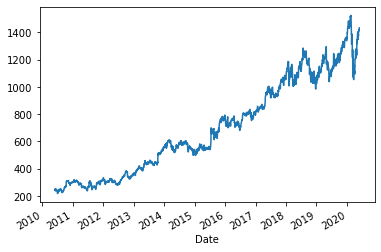

In [42]:

tickerDf.Close.plot()